<center> <h2>DISEÑO FACTORIAL PARA COMPARAR EL DESEMPEÑO EN MODELOS DE CLUSTERING</h2> </center>
<center> <h3><em>Por: Miguel Vélez, David Romero y Mateo Castellanos</em></h3> </center>


***Introducción***

Dentro del aprendizaje **no supervisado** de Machine Learning se encuentran los algoritmos de *Clustering* o agrupación. Estos son modelos que nos permiten hallar perfiles, grupos o patrones dentro de un conjunto de datos, generalmente, donde existan más de dos variables. Existen diversos algoritmos con los que podemos realizar esta misma tarea, sin embargo, cada uno lo hace de forma distinta, algunos de estos son: K-Means, Affinity Propagation, BIRCH, Mean Shift, DBSCAN, entre otros. La mayoría de estos modelos necesitan, principalmente, pasarle como parámetros el conjunto de datos y el número de *Clusters* o la cantidad de grupos en la que queremos segmentar nuestros datos, ya que, a pesar de que existen métodos para encontrar la cantidad ópima de *Clusters*, no siempre son útiles a la hora de resolver un problema; dependerá del contexto, experimento o negocio.

En este trabajo final utilizaremos un diseño factorial con el fin de conocer la mejor combinación de algoritmos y número de clusters que nos entregue la mayor eficiencia en un modelo no supervisado para segmentar un conjunto de datos.


**Conceptos Claves:** Clustering, K-Means, BIRCH, Silhouette Score, Diseño Factorial

***Marco Teórico***

El concepto de machine learning puede ser tan antiguo como las mismas computadoras, a pesar de que actualmente se hable tanto de este tema y sus impactos. La idea de que una máquina pudiera aprender y realizar tareas humanas e incluso realizarlas de una forma más precisa, viene ya desde hace varios años y también ha confrontado a muchos cinetíficos e ingenieros en distintas posiciones. Lo cierto es que en la actualidad la academia y las industrias cada vez adoptan mucho más este concepto que ya ha pasado a ser una cultura y metodología de trabajo para disferentes proyectos, y este proceso ha evolucionado a no solo a cuestionarse la posibilidad de que una máquina pueda aprender y de dónde vendra el conocimiento sino al cómo aprenderá y para qué usar esta metodología (**Kubat, Miroslav. An Introduction to Machine Learning. 2017**); es por esta razón que en este trabajo se ahondara en una de las vertientes del machine learning como lo es el aprendizaje no supervisado, entendiento por este como el conjunto de tareas realizadas por un algoritmo que aprende de un conjunto de datos no etiquetado usando las características de los mismos para categorizarlos de acuerdo a un criterio geométrico o estadístico. (**S. Santi, I. Laura. Introduction To Data Science. 2017**)

Dentro del aprendizaje no supervisado uno de los métodos más utilizados en la actualidad es el de clústering, el cual consiste en agrupar un conjunto de datos de acuerdo a sus características en diferentes subconjuntos que compartan similitudes entre ellas. Un proceso de clustering se puede aplicar bajo diferentes modelos matemáticos y estadísticos, y entre los más populares se encuentra el algoritmo de Kmeans. El algoritmo es uno de los más simples de usar y consiste seleccionar un numero k de clusters definidos por el usuario (existen técnicas estadísticas para determinar ese número óptimo k), para luego calcular las coordenas del centroide de acuerdo al promedio númerico de la muestra de datos y realizar iteraciones por cada registro de los datos, calculando la distancia que tiene con respecto a los centroides y poder ubicarlo en uno de los k clusters definidos.

Cuando hablamos de diseño de experiementos podemos identificar diferentes modelos de diseño de experimentos, sin embargo, en el desarrollo de este trabajo se ha seleccionado un diseño factorial, con el objetivo principal de de evaluar la interacción de diferentes algoritmos no supervisados de clasificación interpretados como factores de bloqueo que al interactuar afectan una variable respuesta como lo puede ser la eficiencia del algoritmo con la agrupación quese obtiene. 

(**D, Angela. V, Daniel. D, Danel. Design and analysis of experiments. 2 ed. 2017**)

Aquí la idea es definir los conceptos claves que anotamos arriba, sin copiar y pegar. Sería bueno también usar citas de autores u otros articulos realcionados con esos conceptos para luego ponerlos en la referencias bibliográficas.

***Descripción del Experimento***

El objetivo del experimento será perfilar a los clientes de algún comercio según sus ingresos anuales, un puntaje de gasto y su edad, esto con el fin de conocer cuántos grupos diferentes de clientes existen en la compañía y sus características, y así, lograr una atención más personalizada para cada grupo particular de clientes.

A continuación podemos observar los primeros 10 registros de la base de datos que usaremos:

In [2]:
mall = pd.read_csv('Mall_Customers.csv')
mall = mall[['Annual Income (k$)','Spending Score (1-100)','Age']]
mall = mall.rename(columns={'Annual Income (k$)':'ingresoAnual','Spending Score (1-100)':'puntajeGasto','Age':'Edad'})
mall.head(10) 

,ingresoAnual,puntajeGasto,Edad
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31
5,17,76,22
6,18,6,35
7,18,94,23
8,19,3,64
9,19,72,30


Como lo que queremos lograr es encontrar el número de grupos que mejor describa a nuestros clientes, usaremos el *Método del Codo*, esto con el fin de conocer la cántidad óptima de clusters. Para determinar este número debemos observar la siguiente gráfica y seleccionar la cantidad de clusters con base al cambio abrupto que se pueda percibir en la ilustración.

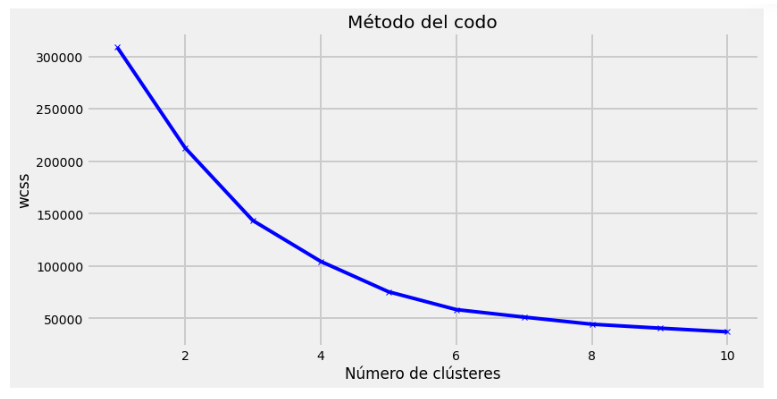

Podemos apreciar que en la gráfica no existe un pico muy notable, sin embargo, sí se logra ver cierto cambio entre 4 y 6 clusters aproximadamente. Debido a lo anterior, y con la finalidad de tener total certeza sobre el número óptimo de clusters y, de paso, conocer qué algoritmo sería mejor en este contexto, se decide emplear un diseño factorial.

Se probará la combinación de dos algoritmos de clustering (K-Means y BIRCH) con 3 cantidades diferentes de clusteres (4, 5 y 6), el modelo se ejecutará 3 veces por combinación y de forma aleatoria. Para este experimento utilizaremos Python y algunas librerías que nos facilitarán el proceso.

A continuación se muestra el código empleado con sus respectivos comentarios:

In [1]:
# Librerías para el manejo y visualización de datos
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly as py
plt.style.use('fivethirtyeight')

# Librerías que contienen los algoritmos la métrica que usaremos
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import Birch

import warnings
warnings.filterwarnings("ignore")

<center> <h3><em>K-means</em></h3> </center>

In [3]:
# Muestra aleatoria con 100 registros
df = mall.sample(100) 

In [16]:
# Implementación de K-Means con 5 clusters
clustering = KMeans(n_clusters=5)
clustering.fit(df)

KMeans(n_clusters=5)

In [17]:
# Eficiencia del modelo al haber ultilizado K-Means con 5 clusters
silhouette_score(df,clustering.labels_)

0.43587915585737586

<center> <h3><em>BIRCH</em></h3> </center>

In [ ]:
# Obtenemos otra muestra aleatoria de 100 registros
df = mall.sample(100)

In [ ]:
# Implementación del algoritmo BIRCH con 5 clusters
birch = Birch(n_clusters=5)
birch.fit(df)

Birch(n_clusters=5)

In [ ]:
# Eficiencia del modelo al haber ultilizado BIRCH con 5 clusters
silhouette_score(df,birch.labels_)

0.41798668168924025

---

## Anlálisis Estadístico

**Elementos del diseño:**

* Factor de interés A: algoritmos de Clustering (2 niveles)
* Factor de interés B: número de clusters (3 niveles)
* Número de tratamientos: 6
* Número de réplicas: 3
* Número de corridas experimentales: 18
* Variable respuesta: eficiencia del modelo de clustering
* Unidad experimental: modelo de clustering


**Modelo:**


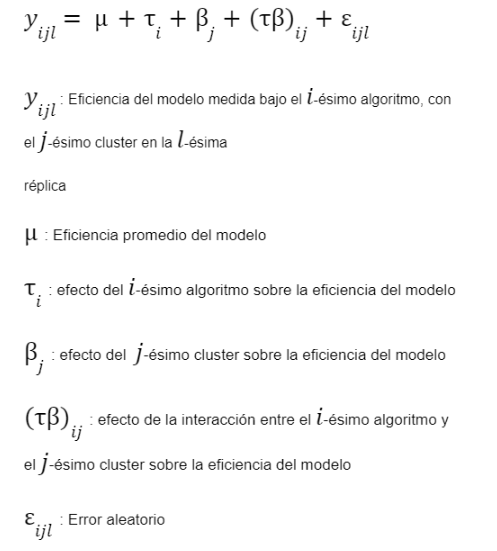

**Análisis de Varianza (ANOVA):**

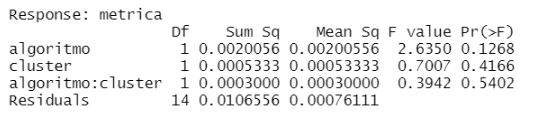

Teniendo en cuenta que estamos realizando el experimento con un alpha de 0.05, podemos apreciar que el valor p asociado a la interacción es menor a este, por lo que se concluye que no existe interacción entre los factores de interés, esto quiere decir que no hay una combinación entre algoritmo y cantidad de clusters que genere una eficiencia diferente. Por otra parte, también podemos concluir a partir de la tabla ANOVA que ninguno de los factores por separado son significativos, es decir, ni los algoritmos empleados, ni la cantidad de clusters evaluados individualmente afectan la eficiencia del modelo, ya que sus valores p también son mayores que 0.05. 

A continuación, validaremos los supuestos del diseño:

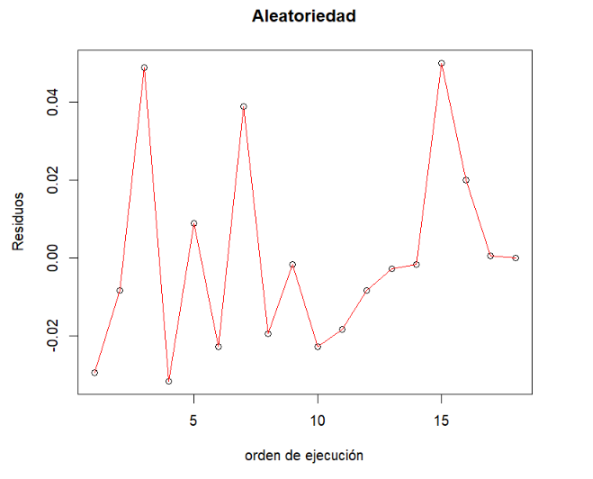

En el gráfico no se observan patrones, ciciclos o tendencias, esto quiere decir que el diseño cumple con el supuesto de aleatoridad.

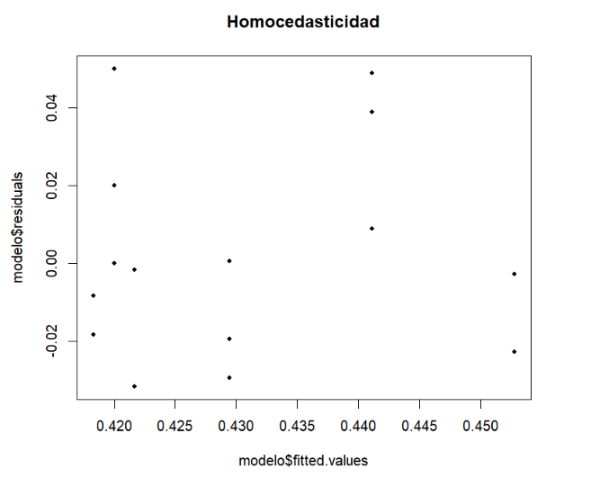

Al observar el gráfico de residuales vs valores ajustados, vemos que no existen formas de moños, embudos o diamentes, por lo que concluimos que el diseño cumple el supuesto de homocedasticidad o varianza constante.

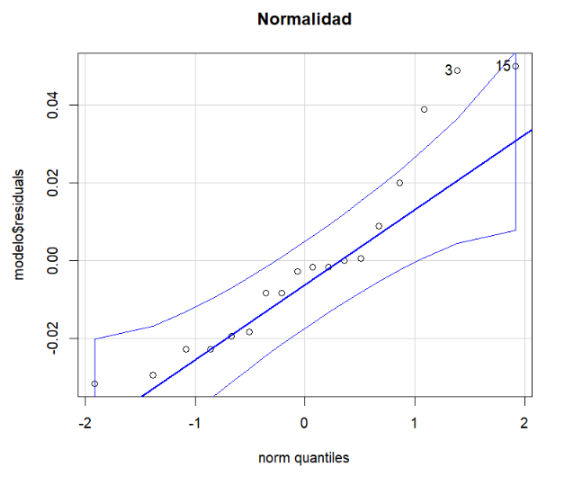

Al evaluar la normalidad del diseño, podemos observar que en la gráfica existen ciertos valores atípicos. Para no tomar decisiones apresuradas, procederemos a usar la prueba numérica para el cumplimiento del supuesto:

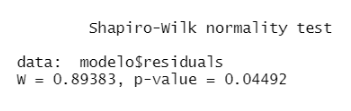

Al realizar la prueba numérica observamos que el valor p es menor, por poco, al alpha (0.05), lo que quiere decir que el diseño no cumple el supuesto de normalidad, tal como lo indicaba el gráfico.

<center> <h3><em>Suma de los efectos</em></h3> </center>

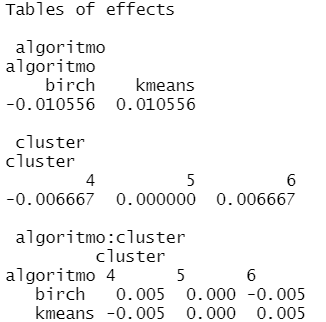

Al sumar los efectos asociados al factor algoritmos, facotor clusters y la combinación de estos, el resultado es igual a cero, esto significa que se cumple es supuesto.

## Conclusiones

* De acuerdo con el resultado obtenido en la ANOVA para la interacción de los factores, no existe interacción entre el algoritmos de clustering y el número de clúster que se escoja (4,5,6).

* Después de analizar la significancia de los factores podemos determinar que ninguno de los dos factores es significativo en la eficiencia del modelo de acuerdo al conjunto de datos seleccionado. 

* A pesar de no existir interacción entre los factores y que ninguno de ellos es significativo, el valor de F de Fisher para el factor algoritmo diferencialmente mayor al del número de cluster y la interacción entre los factores, por lo que podríamos aplicar un diseño distinto al factorial para identificar si tiene significancia bajo unas condiciones distintas. 

## Bibliografía

* Kubat, M. An Introduction to Machine Learning. 2017 

* S. Santi, I. Laura. Introduction To Data Science. 2017

* D, Angela. V, Daniel. D, Danel. Design and analysis of experiments. 2 ed. 2017

* D. Montgomery, Diseño y análisis de experimentos. 5 ed. 2012

* https://www.kaggle.com/datasets/shwetabh123/mall-customers

* Python, versión 3.8. 

* Rstudio, versión 2022.07.1

